Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from metrics_module import metrics
from dataloader_module import load_data
from graphs_module import plot_roc_auc
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

D:\.anaconda\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\.anaconda\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Càrrega i pre-processament de les dades

In [2]:
datafile = "data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)
#X.drop(columns=["age"], inplace=True)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (4908, 18), y shape: (4908,)


## Creació i test de la regressió logística

Accuracy: 0.7536
Precision: 0.1588
Recall: 0.8302
F1 Score: 0.2667


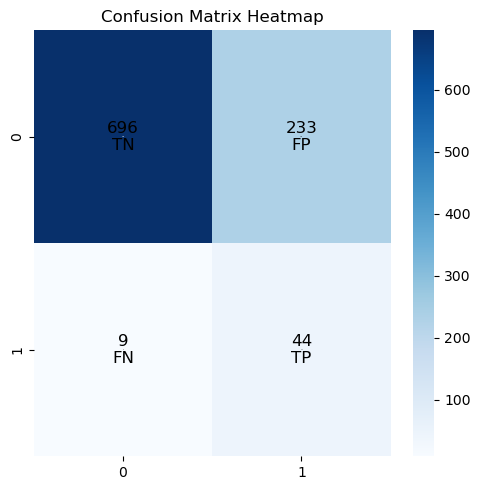

In [3]:
clf = LogisticRegression(max_iter=1000,class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

np.save('predictions/predictions_random_forest.npy', y_pred)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## ROC Curve i AUC

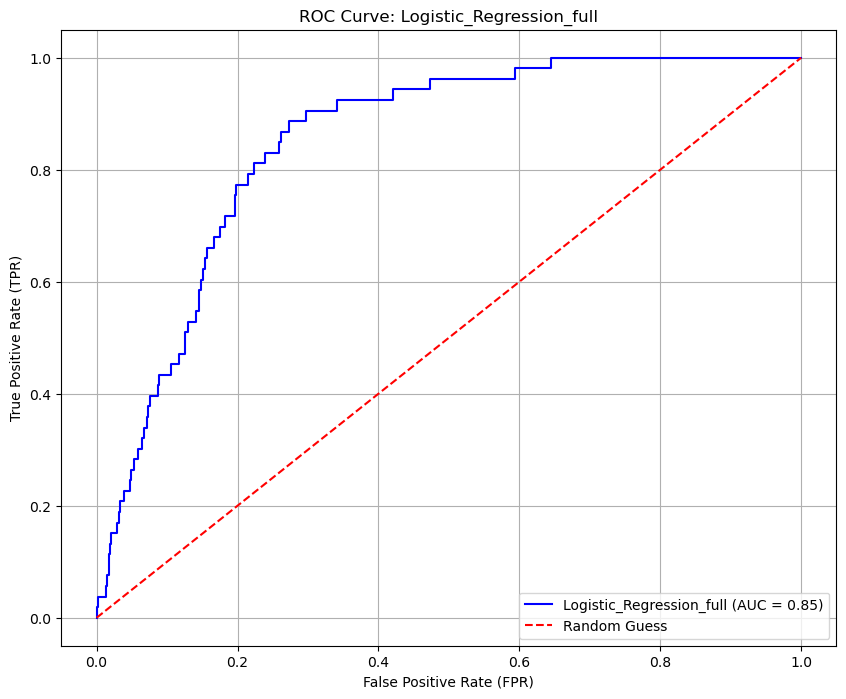

Logistic_Regression_full AUC Score: 0.85


In [4]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic_Regression_full")

## Visualització dels factors més importants pel model

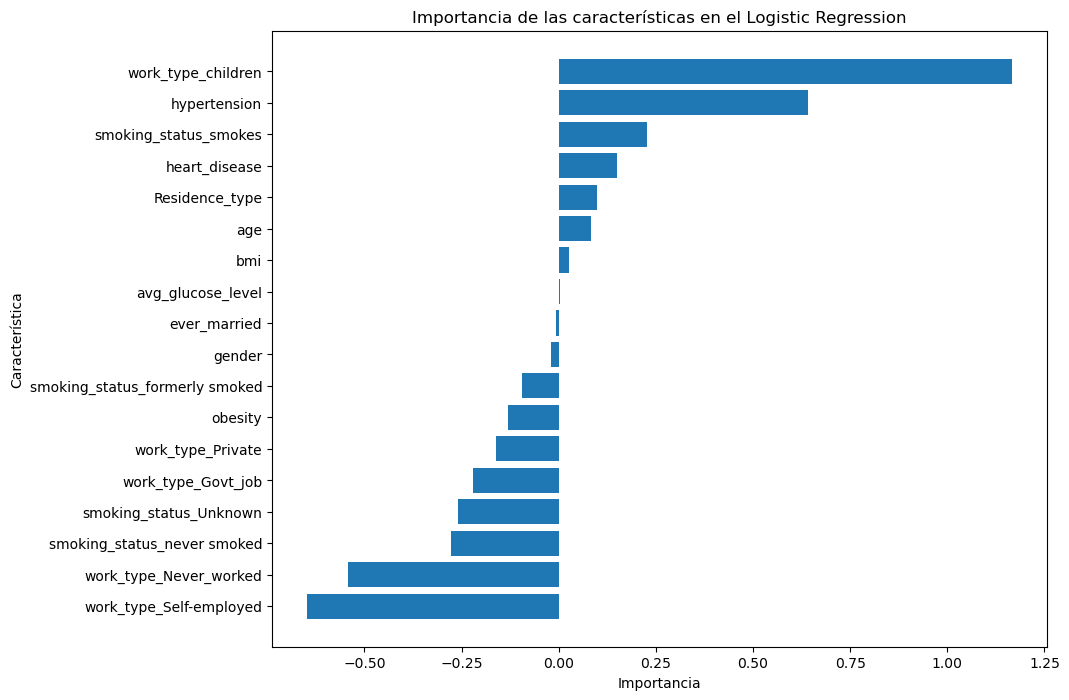

In [5]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# compute importances
model_fi = permutation_importance(clf, X, y)
model_fi['importances_mean']

# create a dataframe with feature importances
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_fi['importances_mean']
})

# sort the dataframe by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# print the sorted feature importances
for index, row in fi_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

age: 0.0584352078239609
work_type_children: 0.025387123064384686
work_type_Self-employed: 0.006560717196414045
work_type_Govt_job: 0.0031784841075795044
obesity: 0.0029339853300733854
smoking_status_never smoked: 0.001955990220048931
work_type_Private: 0.0013854930725346604
hypertension: 0.0008149959250203676
smoking_status_formerly smoked: 0.0006112469437652868
ever_married: 0.00032599837000812926
Residence_type: -4.074979625099395e-05
work_type_Never_worked: -0.00016299918500406463
heart_disease: -0.0002852485737570909
gender: -0.00032599837000812926
smoking_status_smokes: -0.001833740831295838
avg_glucose_level: -0.0030154849225753734
smoking_status_Unknown: -0.004278728606356963
bmi: -0.008394458027709838


## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Accuracy: 0.9460
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


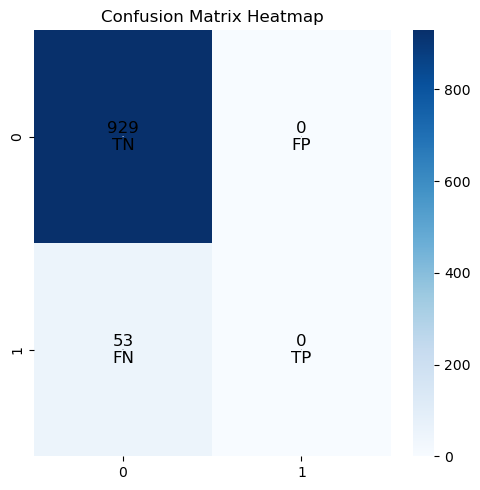

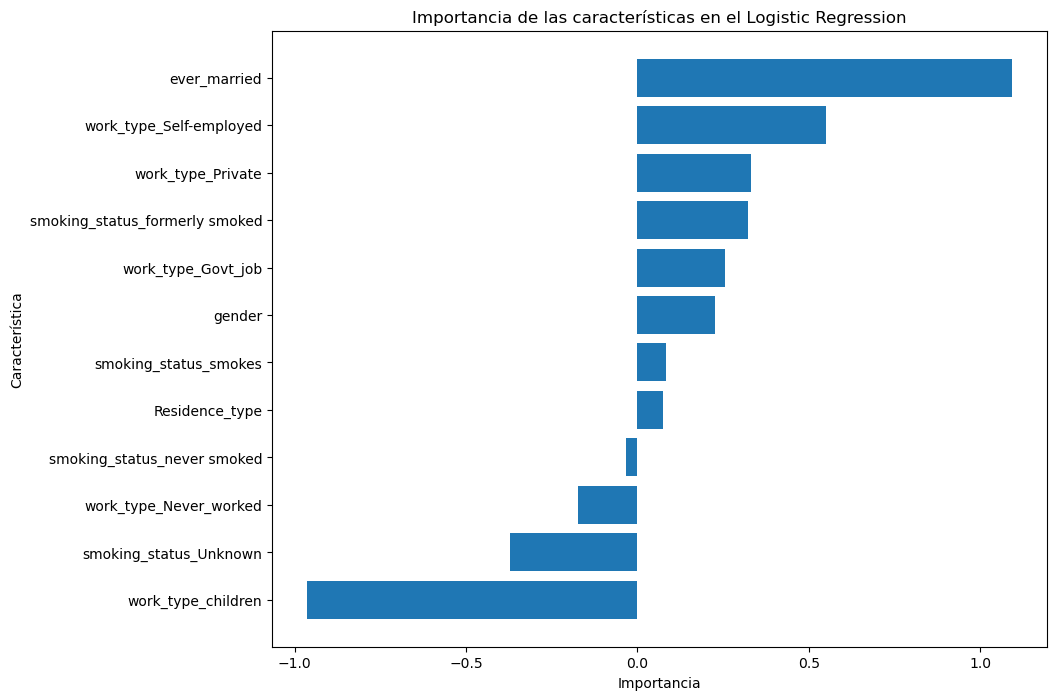

In [17]:
columns_to_drop = ["bmi", "avg_glucose_level", "age"]
X = X.drop(columns=columns_to_drop, errors='ignore')

X = X.replace([float('inf'), -float('inf')], 0)

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## ROC Curve i AUC

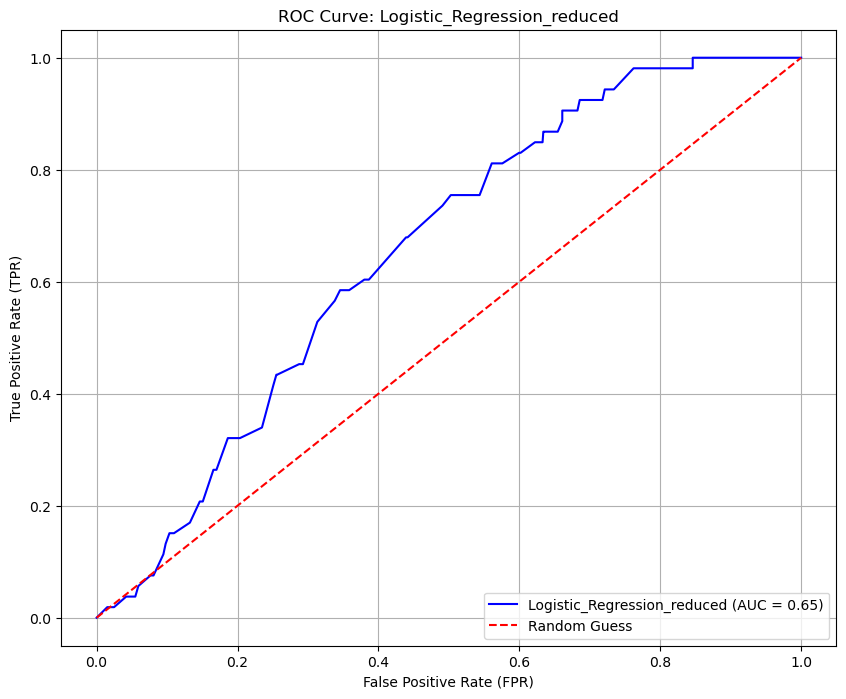

Logistic_Regression_reduced AUC Score: 0.65


In [18]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic_Regression_reduced")